**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

import warnings 
warnings.filterwarnings('ignore')

**Let's create a function for evaluating model**

In [2]:
def evaluation_results(y_true, y_pred, reg_type):
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)

    print('Evaluation metrics for'+reg_type+'Linear Regression')
    print(f'explained_variance: {round(ev, 3)}')
    print(f'MAE: {round(mae, 3)}')
    print(f'MSE: {round(mse, 3)}')
    print(f'r2_Score: {round(r2, 3)}')
    print(f'RMSE: {round(rmse, 3)}')
    print()

**Lets create Dataset**

Simple data with linear relationship and another dataset that has noise on the original data, to compare how model works with ideal and noisy data.

In [3]:
# Generate synthetic data
np.random.seed(42)
noise = 1
X = 2*np.random.rand(1000, 1)
y = 4 + 3*X + noise*np.random.randn(1000, 1)
y_ideal = 4 + 3*X

# Specify the portion of the dataset to add outliers (e.g., the last 20%)
y_outlier = pd.Series(y.reshape(-1).copy())

# Identify indices where the feature variable X is greater than a certain threshold
threshold = 1.5 # Example threshold to add outliers for larger feature values
outlier_indices = np.where(X.flatten()>threshold)[0]

# Add outliers at random locations within the specified portion
num_outliers = 5 # Number of outliers to add
selected_indices = np.random.choice(outlier_indices, num_outliers, replace=False)

# Modify the target values at these indices to create outliers (add significant noise)
y_outlier[selected_indices] += np.random.uniform(50, 100, num_outliers)

**Plot the data with outliers and the ideal fit line**

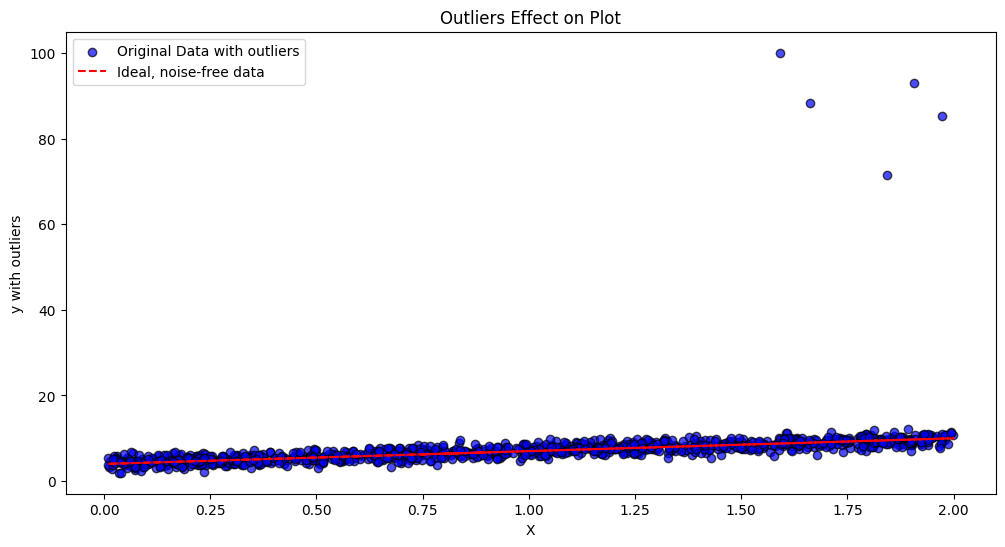

In [4]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y_outlier, color='blue', edgecolors='k', alpha=0.7, label='Original Data with outliers')
plt.plot(X, y_ideal, 'r--', label='Ideal, noise-free data')
plt.title('Outliers Effect on Plot')
plt.xlabel('X')
plt.ylabel('y with outliers')
plt.legend(loc='best')
plt.show()

**Plot the data without the outliers and the ideal fit line**

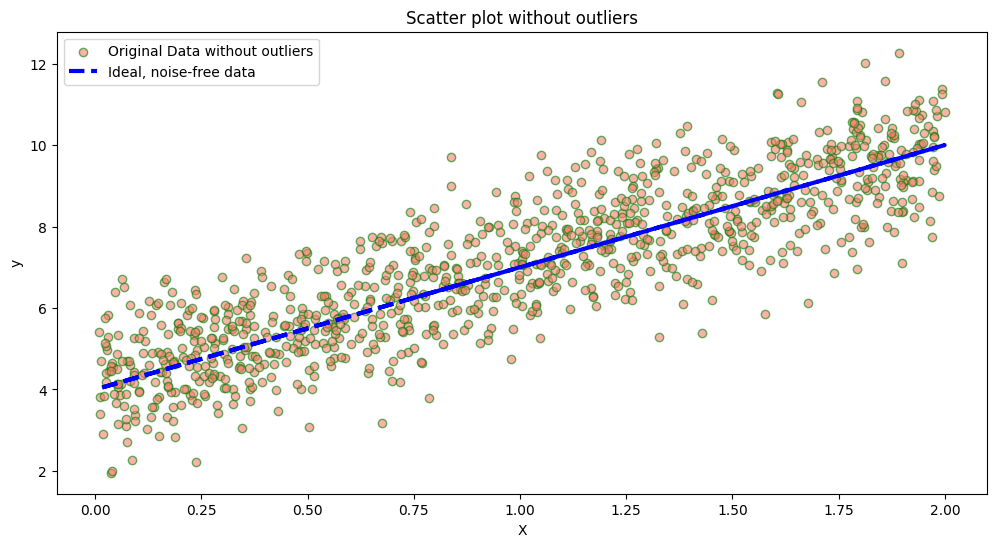

In [5]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='salmon', ec='green', alpha=0.6, label='Original Data without outliers')
plt.plot(X, y_ideal, 'b--', lw=3, label='Ideal, noise-free data')
plt.title('Scatter plot without outliers')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

**Fit Ordinary, Ridge, and Lasso regression models and use them to make predicitions on the original, outlier-free data**

**1. Ordinary Linear Regression**

In [6]:
lin_reg_out = LinearRegression()
lin_reg_out.fit(X, y_outlier)
y_pred_out_lin = lin_reg_out.predict(X)

**2. Lasso Regression**

In [7]:
lasso_reg_out = Lasso(alpha=0.2)
lasso_reg_out.fit(X, y_outlier)
y_pred_out_lasso = lasso_reg_out.predict(X)

**3. Ridge Regression**

In [8]:
ridge_reg_out = Ridge(alpha=1)
ridge_reg_out.fit(X, y_outlier)
y_pred_out_ridge = ridge_reg_out.predict(X)

**Lets print the model evaluation result**

In [9]:
evaluation_results(y, y_pred_out_lin, reg_type=' Ordinary ')
evaluation_results(y, y_pred_out_ridge, reg_type=' Ridge ')
evaluation_results(y, y_pred_out_lasso, reg_type=' Lasso ')

Evaluation metrics for Ordinary Linear Regression
explained_variance: 0.675
MAE: 0.947
MSE: 1.416
r2_Score: 0.636
RMSE: 1.19

Evaluation metrics for Ridge Linear Regression
explained_variance: 0.677
MAE: 0.944
MSE: 1.409
r2_Score: 0.638
RMSE: 1.187

Evaluation metrics for Lasso Linear Regression
explained_variance: 0.739
MAE: 0.86
MSE: 1.165
r2_Score: 0.7
RMSE: 1.079



**Plot the data and the predictions for comparison with outliers**

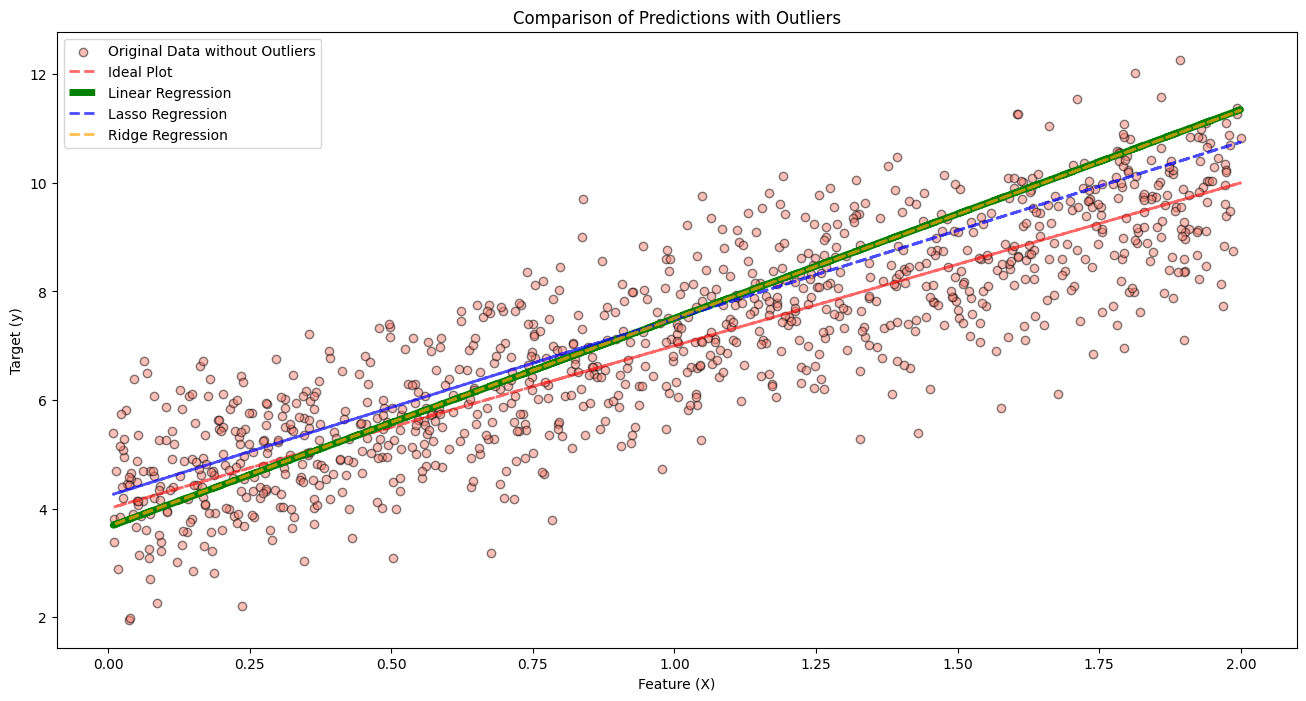

In [10]:
plt.figure(figsize=(16, 8))
plt.scatter(X, y, color='salmon', ec='k', alpha=0.5, label='Original Data without Outliers')
plt.plot(X, y_ideal, 'r--', alpha=0.6, lw=2, label='Ideal Plot')

# Plot ordinary linear regression
plt.plot(X, y_pred_out_lin, 'g--', lw=5, alpha=1, label='Linear Regression')
# Plot Lasso Linear Regression
plt.plot(X, y_pred_out_lasso, 'b--', lw=2, alpha=0.7, label='Lasso Regression')
# Plot Ridge Linear Regression
plt.plot(X, y_pred_out_ridge, color='orange', ls='--', lw=2, alpha=0.7, label='Ridge Regression')
plt.title('Comparison of Predictions with Outliers')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend(loc='best')
plt.show()

**Observations**</br>
As you can see, ordinary linear and ridge resgression performed similarly, while Lasso outperformed both. Although the intercept is off for the Lasso fit line, it's slope is much closer to the ideal than the other fit lines. All three lines were 'pulled up' by the outliers

**Build the models and the prediction plots from the same data, excluding the outliers**

In [11]:
# For Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# For Ridge Regression
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)
y_pred_ridge = ridge_reg.predict(X)

# For Lasso Regression
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X, y)
y_pred_lasso = lasso_reg.predict(X)

* Evaluating the model

In [12]:
evaluation_results(y, y_pred_lin, reg_type=' Linear ')
evaluation_results(y, y_pred_ridge, reg_type=' Ridge ')
evaluation_results(y, y_pred_lasso, reg_type=' Lasso ')

Evaluation metrics for Linear Linear Regression
explained_variance: 0.749
MAE: 0.787
MSE: 0.975
r2_Score: 0.749
RMSE: 0.987

Evaluation metrics for Ridge Linear Regression
explained_variance: 0.749
MAE: 0.787
MSE: 0.975
r2_Score: 0.749
RMSE: 0.987

Evaluation metrics for Lasso Linear Regression
explained_variance: 0.719
MAE: 0.841
MSE: 1.092
r2_Score: 0.719
RMSE: 1.045



* Let's now plot the result

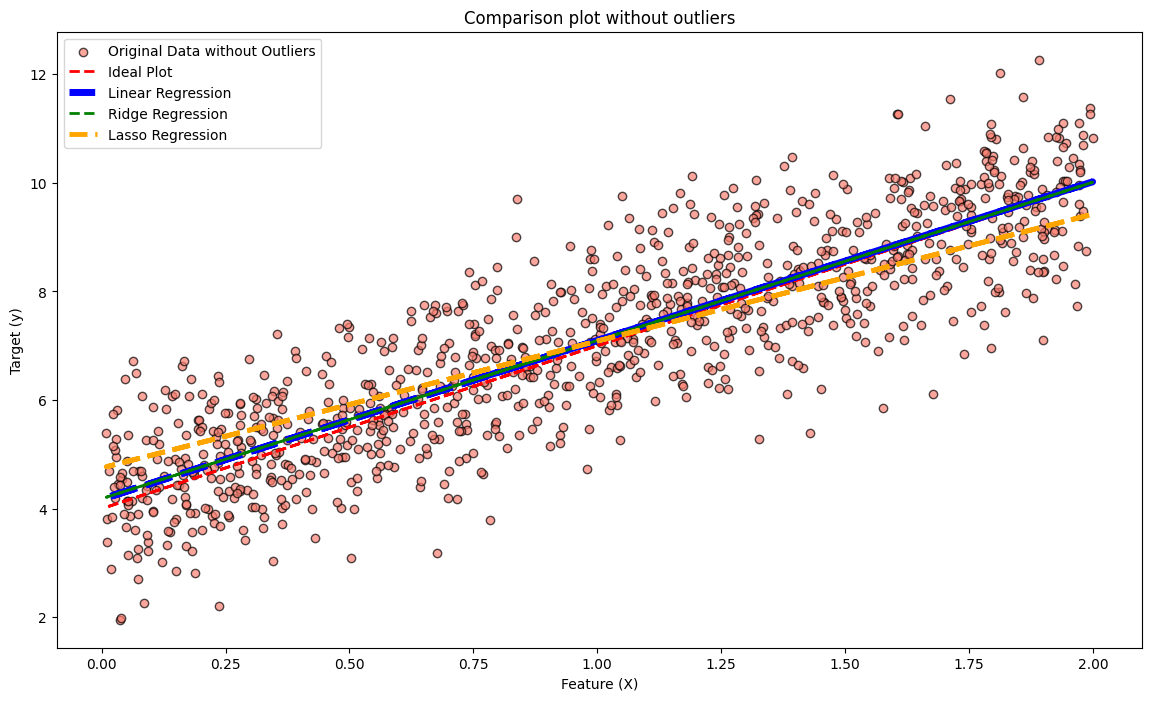

In [13]:
plt.figure(figsize=(14, 8))
plt.scatter(X, y, color='salmon', ec='k', alpha=0.7, label='Original Data without Outliers')
plt.plot(X, y_ideal, color='red', ls='--', lw=2, label='Ideal Plot')

# Predicted Regresisons
plt.plot(X, y_pred_lin, 'b--', lw=5, label='Linear Regression')
plt.plot(X, y_pred_ridge, 'g--', lw=2, label='Ridge Regression')
plt.plot(X, y_pred_lasso, color='orange', ls='--', lw=3.5, label='Lasso Regression')
plt.title('Comparison plot without outliers')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend(loc='best')
plt.show()

### Create a high dimensional synthetic dataset with a small number of informative features using `make_regression`

The output of `make_regression` is generated by applying a random linear regression model based on `n_informative` nonzero regressors and some adjustable gaussian noise.
Along with the features and the target vairable, the regression model coefficients can also be obtained from the output.

We'll split the data into training and testing sets, and also split the ideal predictions, which is a line based on the linear regression model.

In [15]:
from sklearn.datasets import make_regression

X, y, ideal_coef = make_regression(n_samples = 100, n_features = 100, n_informative = 10, noise = 10, random_state = 42, coef = True)

# Get the ideal predictions based on the informative coefficients used in the regression model
ideal_prediction = X@ideal_coef # `@` represents dot product

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, ideal_train, ideal_test = train_test_split(X, y, ideal_prediction, test_size=0.3, random_state=42)

**Initialize and fit the linear regression models and use them to predict the target**

In [16]:
lin = LinearRegression()
lasso = Lasso(alpha=1)
ridge = Ridge(alpha=0.1)

# Fit the model
lin.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred_lin_ = lin.predict(X_test)
y_pred_lasso_ = lasso.predict(X_test)
y_pred_ridge_ = ridge.predict(X_test)

**Print regression result**

In [17]:
evaluation_results(y_test, y_pred_lin_, reg_type=' Ordinary ')
evaluation_results(y_test, y_pred_lasso_, reg_type=' Lasso ')
evaluation_results(y_test, y_pred_ridge_, reg_type=' Ridge ')

Evaluation metrics for Ordinary Linear Regression
explained_variance: 0.435
MAE: 77.735
MSE: 9844.271
r2_Score: 0.402
RMSE: 99.218

Evaluation metrics for Lasso Linear Regression
explained_variance: 0.99
MAE: 9.951
MSE: 160.868
r2_Score: 0.99
RMSE: 12.683

Evaluation metrics for Ridge Linear Regression
explained_variance: 0.437
MAE: 77.649
MSE: 9830.769
r2_Score: 0.403
RMSE: 99.15



<details><summary>Click here for the solution</summary>
The results for ordinary and ridge regession are poor. Explained variances are under 50%, and R^2 is very low. However, ther result for Lasso is stellar.


**Plot the `Actual` vs `Predictions`**

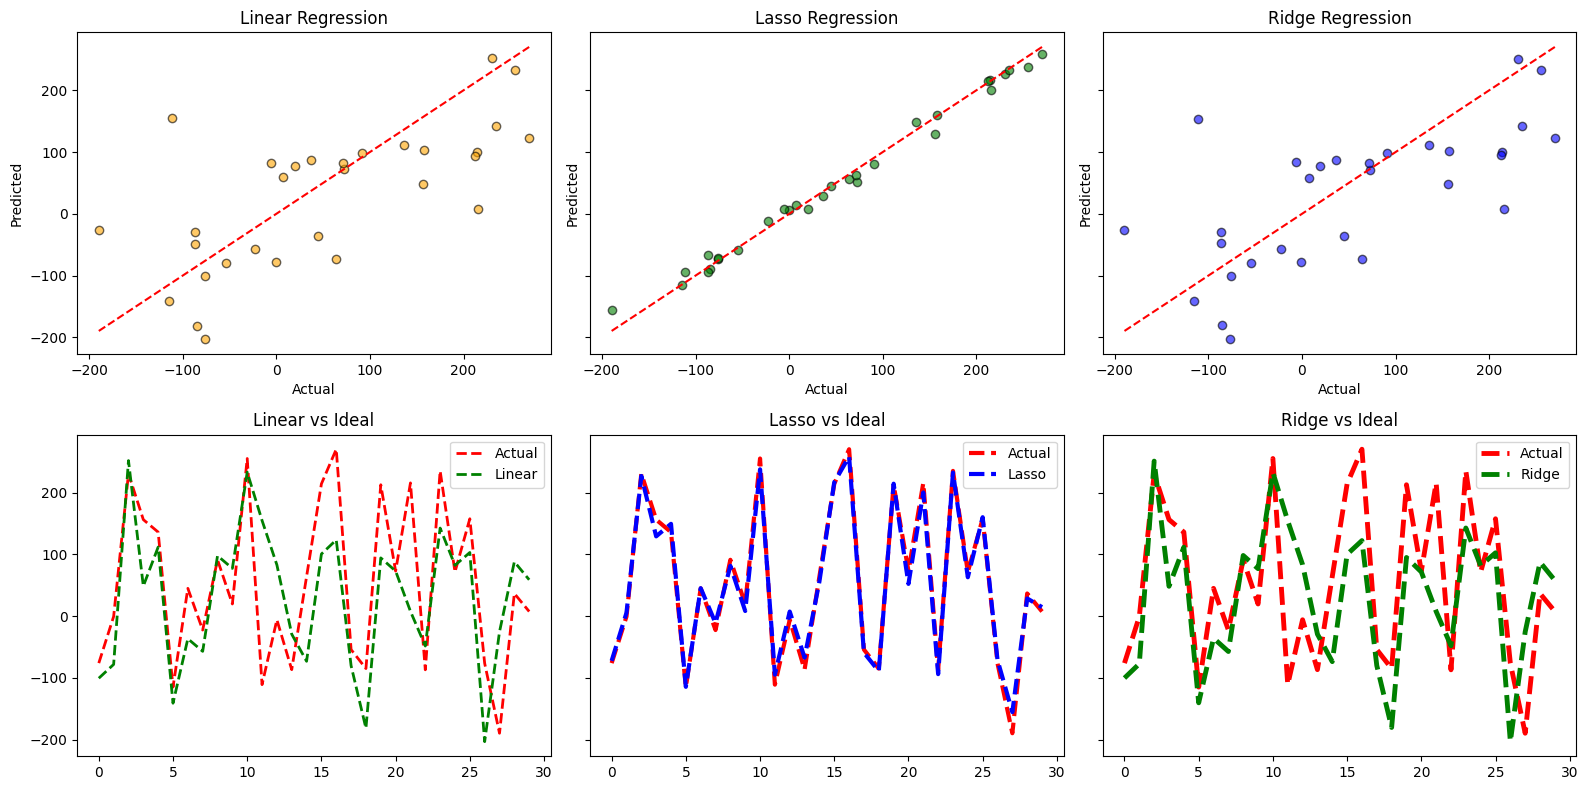

In [95]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(ncols=3, nrows=2, figsize=(16, 8), sharey=True)

# Linear Regression Plot
ax0.scatter(y_test, y_pred_lin_, color='orange', alpha=0.6, ec='k', label='Linear Regression')
ax0.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax0.set_title("Linear Regression")
ax0.set_xlabel("Actual",)
ax0.set_ylabel("Predicted",)

# Lasso Regression Plot
ax1.scatter(y_test, y_pred_lasso_, color='green', ec='k', alpha=0.6, label='Lasso Regression Plot')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax1.set_title("Lasso Regression")
ax1.set_xlabel("Actual",)
ax1.set_ylabel("Predicted",)

# Ridge Regression Plot
ax2.scatter(y_test, y_pred_ridge_, color='blue', ec='k', alpha=0.6, label='Ridge Regression Plot')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax2.set_title("Ridge Regression")
ax2.set_xlabel("Actual",)
ax2.set_ylabel("Predicted",)

## Line plots for predictions compared to actual and ideal predictions
ax3.plot(y_test, 'r--', lw=2, label='Actual')
ax3.plot(y_pred_lin_, 'g--', lw=2, label='Linear') # y_pred_lin will be plotted in y-axis, and x-axis will be plotted automatically
ax3.set_title('Linear vs Ideal')
ax3.legend(loc='best')

ax4.plot(y_test, 'r--', lw=3, label='Actual')
ax4.plot(y_pred_lasso_, 'b--', lw=3, label='Lasso')
ax4.set_title('Lasso vs Ideal')
ax4.legend(loc='best')

ax5.plot(y_test, 'r--', lw=3.5, label='Actual')
ax5.plot(y_pred_ridge_, 'g--', lw=3.5, label='Ridge')
ax5.set_title('Ridge vs Ideal')
ax5.legend(loc='best')

plt.tight_layout()
plt.show()

**Model coefficients**

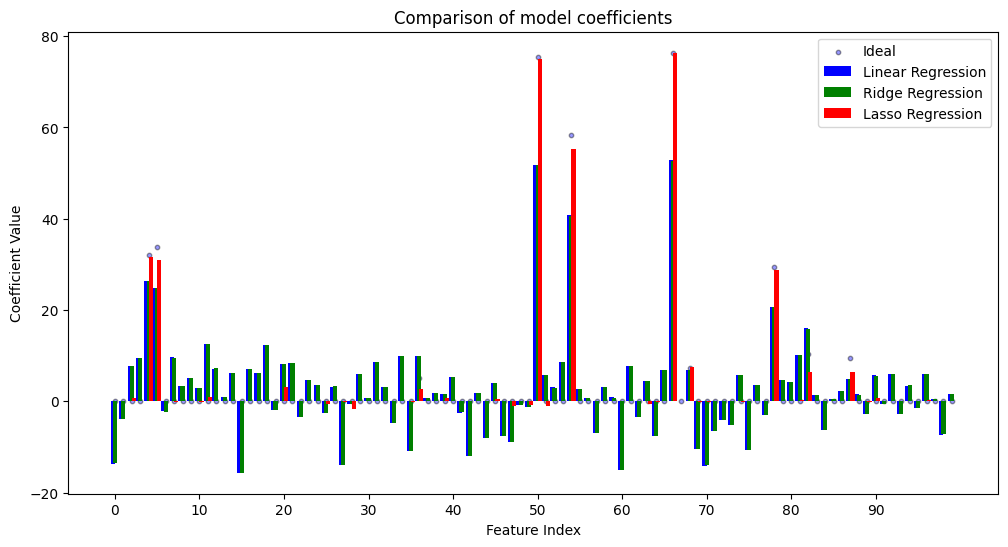

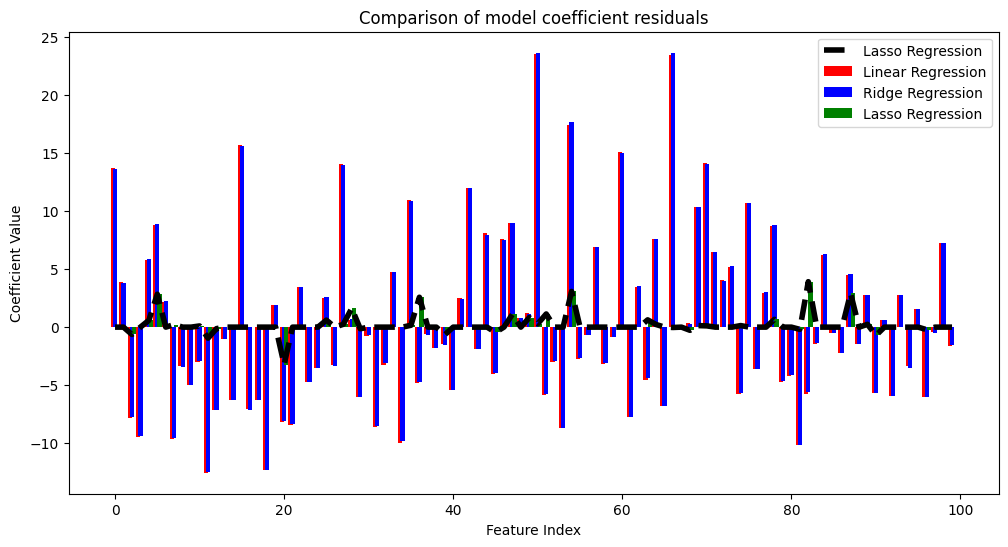

In [33]:
# Model coefficients
lin_coeff = lin.coef_
ridge_coeff = ridge.coef_
lasso_coeff = lasso.coef_

# Plot the coefficients
x_axis = np.arange(len(lin_coeff))
x_labels = np.arange(min(x_axis), max(x_axis), 10)

plt.figure(figsize=(12, 6))
plt.scatter(x_axis, ideal_coef, color='blue', ec='k', alpha=0.4, label='Ideal', s=10)
plt.bar(x_axis-0.25, lin_coeff, width=0.5, label='Linear Regression', color='blue')
plt.bar(x_axis, ridge_coeff, width = 0.5, label='Ridge Regression', color='green')
plt.bar(x_axis+0.25, lasso_coeff, width=0.5, label='Lasso Regression', color='red')

plt.title('Comparison of model coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.xticks(x_labels)
plt.legend()
plt.show()

# Plot the coefficient residuals
plt.figure(figsize=(12, 6))
x_axis = np.arange(len(lin_coeff))

plt.bar(x_axis-0.25, ideal_coef-lin_coeff, width=0.5, color='red', label='Linear Regression')
plt.bar(x_axis, ideal_coef-ridge_coeff, color='blue', width=0.5, label='Ridge Regression')
plt.bar(x_axis+0.25, ideal_coef-lasso_coeff, color='green', width=0.5, label='Lasso Regression')
plt.plot(x_axis, ideal_coef-lasso_coeff, 'k--', label='Lasso Regression', lw=4)
plt.title('Comparison of model coefficient residuals')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend(loc='best')
plt.show()

<details><summary>Click here</summary>

You can see from the first plot how much closer the Lasso coefficients are to the ideal coefficients than for the other two models.
An easier way to visualize the difference is to look at the residual errors, as in the second plot. Clearly the Lasso coefficient residuals are much closer to zero than the others.

**Part-1: Use Lasso to select the most important features and compare the three different linear regression models again on the resulting data**

Use the coefficient residual plot to select a reasonable threshold value, beyond which the Lasso coefficients are significant.
To find a good threshold you can visually inspect the residuals plot and choose a value that distinguishes coefficients with larger than normal residuals.

Create a dataframe to compare the Lasso coefficients with the ideal coefficients, for the features selected with the Lasso coefficent threshold.

Include a boolean column that indicates whether the feature was selected as being important by the Lasso coefficent thresholding.

Display two filtered versions of the resulting dataframe:

1. Only those features identified as important by Lasso

2. Only the nonzero ideal coefficient indices


In [74]:
thresholds = 5 # selected by inspection of residuals plot

# Create a dataframe containing the Lasso model and ideal coefficients
feature_importance_df = pd.DataFrame({
    'Lasso Coefficient':lasso_coeff,
    'Ideal Coefficient':ideal_coef}
)
# Mark the selected features
feature_importance_df['Feature Selected'] =  feature_importance_df['Lasso Coefficient'].abs()>thresholds

print('Features considered important by Lasso: ')
display(feature_importance_df[feature_importance_df['Feature Selected']])

print('Non-zero Ideal Cofficients: ')
display(feature_importance_df[feature_importance_df['Ideal Coefficient']>0])

Features considered important by Lasso: 


,Lasso Coefficient,Ideal Coefficient,Feature Selected
4,31.538979,32.125517,True
5,30.854193,33.692687,True
50,75.029413,75.319970,True
54,55.207642,58.286936,True
66,76.359734,76.330808,True
68,7.452961,7.180755,True
78,28.763612,29.434817,True
82,6.383133,10.301919,True
87,6.513647,9.427598,True


Non-zero Ideal Cofficients: 


,Lasso Coefficient,Ideal Coefficient,Feature Selected
4,31.538979,32.125517,True
5,30.854193,33.692687,True
36,2.590619,5.166218,False
50,75.029413,75.319970,True
54,55.207642,58.286936,True
66,76.359734,76.330808,True
68,7.452961,7.180755,True
78,28.763612,29.434817,True
82,6.383133,10.301919,True
87,6.513647,9.427598,True


#### Part 2. Use the threshold to select the most important features for use in modelling.

In [77]:
important_features = feature_importance_df[feature_importance_df['Feature Selected']].index

In [85]:
X_filtered = X[:, important_features]
print(f'Shape of the filtered feature set: {X_filtered.shape}')

# Lets split data in train and test sets
X_train, X_test, y_train, y_test, ideal_trian, ideal_test = train_test_split(X_filtered, y, ideal_prediction, test_size=0.3, random_state=42)

Shape of the filtered feature set: (100, 9)


#### Part 3. Fit and apply the three models to the selected features

In [86]:
# Initialize the model
lasso_ = Lasso(alpha=0.1)
ridge_ = Ridge(alpha=1)
lin_ = LinearRegression()

# Fit the model
lasso_.fit(X_train, y_train)
ridge_.fit(X_train, y_train)
lin_.fit(X_train, y_train)

y_lin = lin_.predict(X_test)
y_ridge = ridge_.predict(X_test)
y_lasso = lasso_.predict(X_test)

##### Print the regression performance results

In [88]:
evaluation_results(y_test, y_lin, reg_type=' Ordinary ')
evaluation_results(y_test, y_ridge, reg_type=' Ridge ')
evaluation_results(y_test, y_lasso, reg_type=' Lasso ')

Evaluation metrics for Ordinary Linear Regression
explained_variance: 0.993
MAE: 8.779
MSE: 125.449
r2_Score: 0.992
RMSE: 11.2

Evaluation metrics for Ridge Linear Regression
explained_variance: 0.991
MAE: 9.408
MSE: 144.84
r2_Score: 0.991
RMSE: 12.035

Evaluation metrics for Lasso Linear Regression
explained_variance: 0.992
MAE: 8.813
MSE: 127.061
r2_Score: 0.992
RMSE: 11.272



#### Lets plot the results

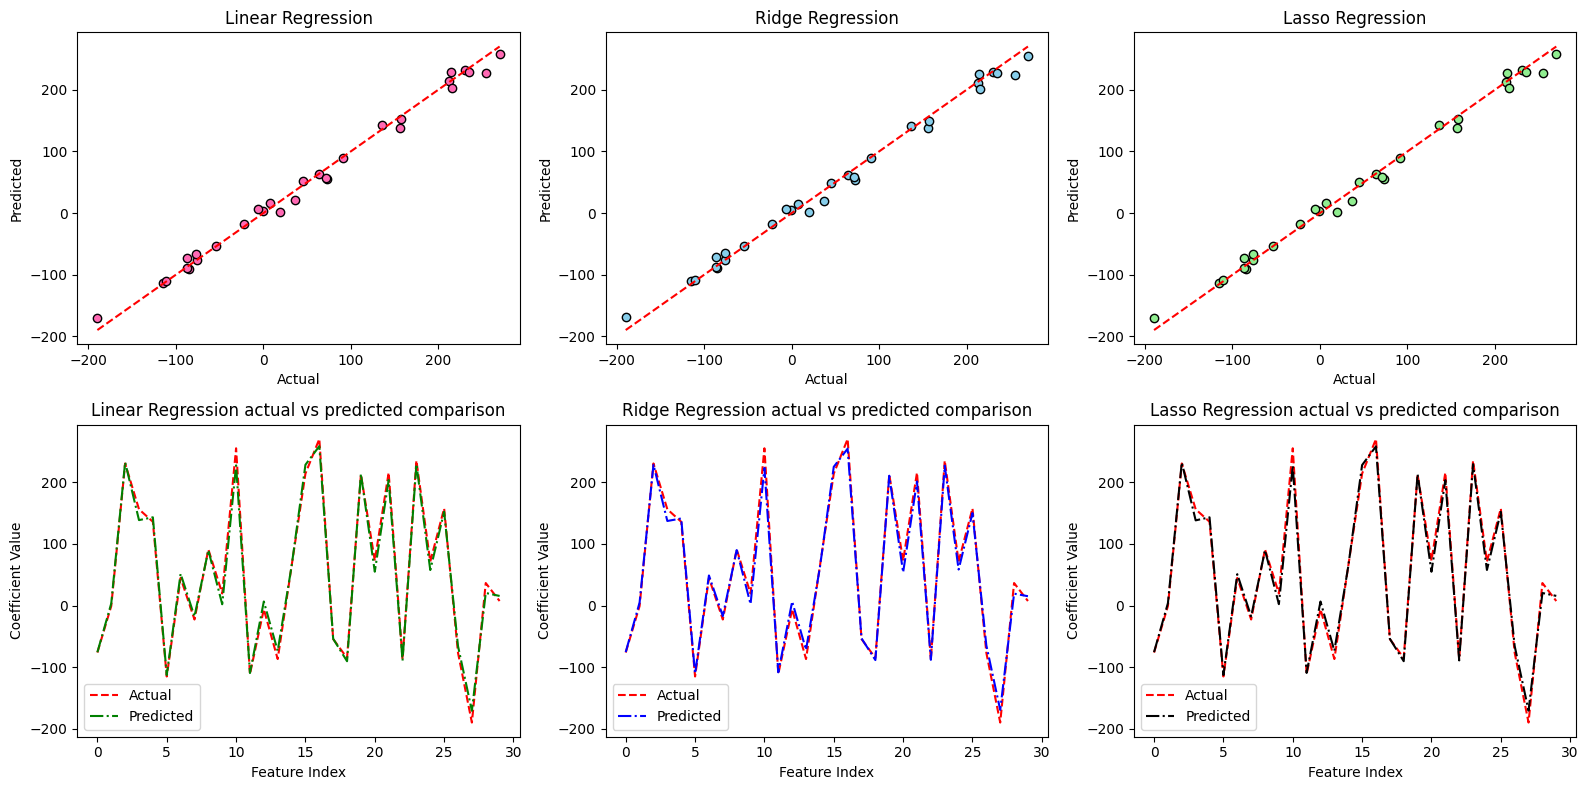

In [106]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Linear Regression
ax[0, 0].scatter(y_test, y_lin, color='hotpink', ec='k', label='Linear')
ax[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax[0, 0].set_title('Linear Regression')
ax[0, 0].set_xlabel('Actual')
ax[0, 0].set_ylabel('Predicted')

# Ridge regression
ax[0, 1].scatter(y_test, y_ridge, color='skyblue', ec='k', label='Ridge')
ax[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax[0, 1].set_title('Ridge Regression')
ax[0, 1].set_xlabel('Actual')
ax[0, 1].set_ylabel('Predicted')

# Lasso Regression
ax[0, 2].scatter(y_test, y_lasso, color='lightgreen', ec='k', label='Lasso')
ax[0, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
ax[0, 2].set_title('Lasso Regression')
ax[0, 2].set_xlabel('Actual')
ax[0, 2].set_ylabel('Predicted')

# Line plots for predictions compared to actual and ideal predictions
ax[1, 0].plot(y_test, color='red', ls='--', label='Actual')
ax[1, 0].plot(y_lin, color='green', ls='-.', label='Predicted')
ax[1, 0].set_title('Linear Regression actual vs predicted comparison')
ax[1, 0].set_xlabel('Feature Index')
ax[1, 0].set_ylabel('Coefficient Value')
ax[1, 0].legend(loc='best')

# Ridge
ax[1, 1].plot(y_test, color='red', ls='--', label='Actual')
ax[1, 1].plot(y_ridge, color='blue', ls='-.', label='Predicted')
ax[1, 1].set_title('Ridge Regression actual vs predicted comparison')
ax[1, 1].set_xlabel('Feature Index')
ax[1, 1].set_ylabel('Coefficient Value')
ax[1, 1].legend(loc='best')

# Lasso
ax[1, 2].plot(y_test, color='red', ls='--', label='Actual')
ax[1, 2].plot(y_lasso, color='black', ls='-.', label='Predicted')
ax[1, 2].set_title('Lasso Regression actual vs predicted comparison')
ax[1, 2].set_xlabel('Feature Index')
ax[1, 2].set_ylabel('Coefficient Value')
ax[1, 2].legend(loc='best')

plt.tight_layout()
plt.show()